In [2]:
import pandas as pd
from sodapy import Socrata

import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

Index(['crash_date', 'crash_time', 'on_street_name', 'off_street_name',
       'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2',
       'collision_id', 'vehicle_type_code1', 'vehicle_type_code2', 'borough',
       'zip_code', 'latitude', 'longitude', 'location', 'cross_street_name',
       'contributing_factor_vehicle_3', 'vehicle_type_code_3',
       'contributing_factor_vehicle_4', 'vehicle_type_code_4',
       'contributing_factor_vehicle_5', 'vehicle_type_code_5'],
      dtype='object')


ValueError: 'right_df' should be GeoDataFrame, got <class 'pandas.core.frame.DataFrame'>

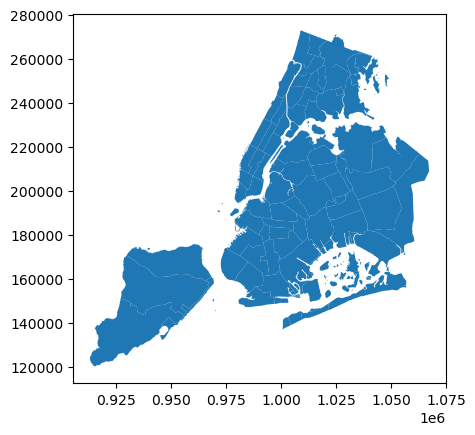

In [5]:
client = Socrata("data.cityofnewyork.us", None)
results = client.get("h9gi-nx95", limit=10000)
results_df = pd.DataFrame.from_records(results)

for crash in results_df.index:
    x = results_df[crash, 'latitude']

communitydistricts = gpd.read_file('nycd_23d/nycd.shp')
dsmap = communitydistricts.plot()

cd_count = gpd.sjoin(communitydistricts, results_df, how='left')
print(cd_count.head())
